# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Ensure units are in celsius
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nellore
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | roccella ionica
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | sur
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | singaraja
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | dingwall
Processing Record 18 of Set 1 | puerto lempira
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | tse

Processing Record 38 of Set 4 | dubrovnik
Processing Record 39 of Set 4 | mareeba
Processing Record 40 of Set 4 | kimry
Processing Record 41 of Set 4 | vodnyy
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | gadzhiyevo
Processing Record 44 of Set 4 | maumere
Processing Record 45 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | paphos
Processing Record 48 of Set 4 | colonel hill
Processing Record 49 of Set 4 | romanovka
Processing Record 0 of Set 5 | igarape miri
Processing Record 1 of Set 5 | guaxupe
Processing Record 2 of Set 5 | alo
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | lambarene
Processing Record 5 of Set 5 | sorong
Processing Record 6 of Set 5 | charters towers
Processing Record 7 of Set 5 | hays
Processing Record 8 of Set 5 | nanao
Processing Record 9 of Set 5 | charlestown
Processing Record 10 of Set 5 | key largo
Processing Record 11 of Set 

Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | el sauzal de rodriguez
Processing Record 32 of Set 8 | akrehamn
Processing Record 33 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 34 of Set 8 | rayachoti
Processing Record 35 of Set 8 | holualoa
Processing Record 36 of Set 8 | zalari
Processing Record 37 of Set 8 | ust'-barguzin
Processing Record 38 of Set 8 | banamba
Processing Record 39 of Set 8 | aguada de pasajeros
Processing Record 40 of Set 8 | dwarka
Processing Record 41 of Set 8 | piti village
Processing Record 42 of Set 8 | tazacorte
Processing Record 43 of Set 8 | hualien city
Processing Record 44 of Set 8 | jumla
Processing Record 45 of Set 8 | quillacollo
Processing Record 46 of Set 8 | pemangkat
Processing Record 47 of Set 8 | seorinarayan
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | ellsworth
Processing Record 0 of Set 9 | choibalsan
Processing Record 1 of Set 9 | leticia
Processing Record 2 of S

Processing Record 18 of Set 12 | pativilca
Processing Record 19 of Set 12 | chaksu
Processing Record 20 of Set 12 | kotlas
Processing Record 21 of Set 12 | quellon
Processing Record 22 of Set 12 | ubrique
Processing Record 23 of Set 12 | port pirie
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | acapulco de juarez
Processing Record 26 of Set 12 | carbonear
Processing Record 27 of Set 12 | nogliki
Processing Record 28 of Set 12 | panama city beach
Processing Record 29 of Set 12 | sittwe
Processing Record 30 of Set 12 | iwanai
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | manismata
Processing Record 33 of Set 12 | tobelo
Processing Record 34 of Set 12 | clodomira
Processing Record 35 of Set 12 | grand falls-windsor
Processing Record 36 of Set 12 | oltinko'l
Processing Record 37 of Set 12 | bardai
Processing Record 38 of Set 12 | port-vila
Processing Record 39 of Set 12 | ormara
Processing Record 40 of Set 12 | alaghsas
Processing Record 4

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,286.40,47,75,9.77,CL,1699818572
1,touros,-5.1989,-35.4608,299.82,70,1,6.87,BR,1699818406
2,grytviken,-54.2811,-36.5092,277.90,82,100,1.90,GS,1699818572
3,avarua,-21.2078,-159.7750,296.18,64,75,3.09,CK,1699818572
4,port-aux-francais,-49.3500,70.2167,279.14,91,100,11.63,TF,1699818277


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

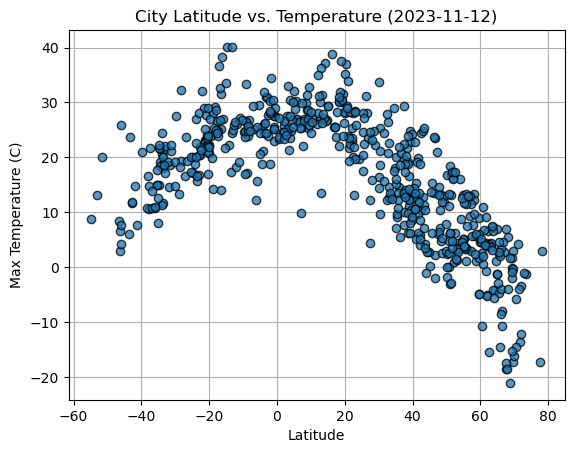

In [26]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], linestyle = 'none', marker="o", markeredgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

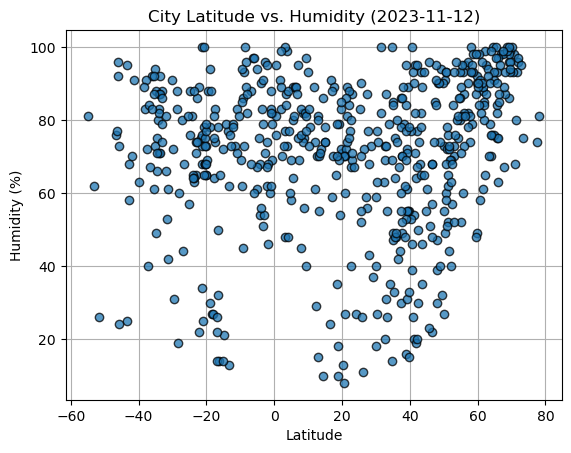

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], city_data_df["Humidity"], linestyle = 'none', marker="o", markeredgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

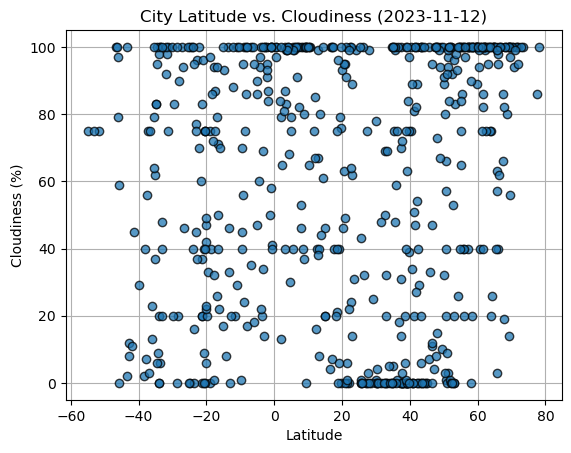

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], city_data_df["Cloudiness"], linestyle = 'none', marker="o", markeredgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

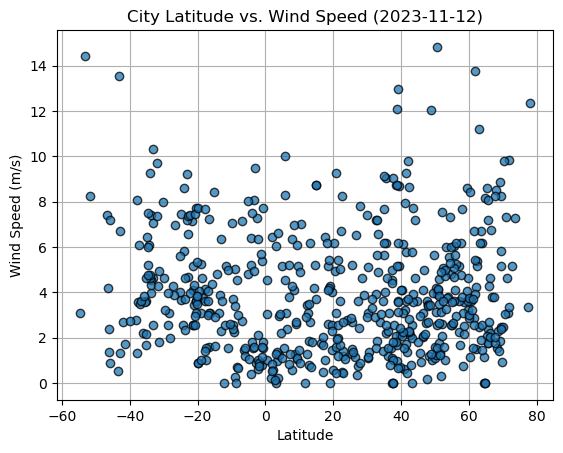

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], city_data_df["Wind Speed"], linestyle = 'none', marker="o", markeredgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, xy):
    
    # Linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Regression Line
    regress_values = x_values * slope + intercept
    
    # Scatter Plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)
    
    # Plot the Regression Line
    plt.plot(x_values, regress_values, "r-")

    # Add the linear regression to the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, xy, fontsize=12, color="red")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display r-squared value
    print(f"The r-squared is: {r_value**2}")

    # Show plot
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434125


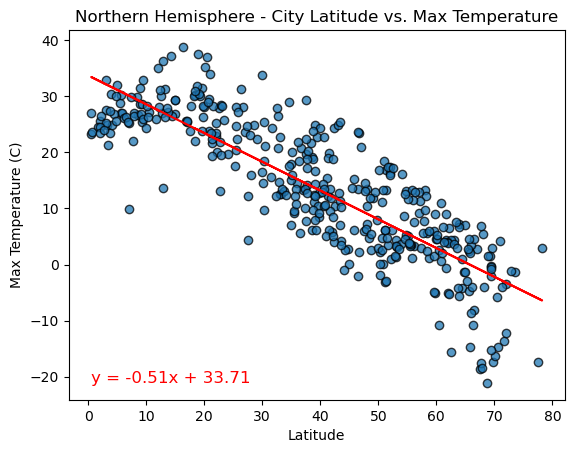

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

xy = (min(x_values), min(y_values))

plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (C)", "Northern Hemisphere - City Latitude vs. Max Temperature", xy)

The r-squared is: 0.4121057168607252


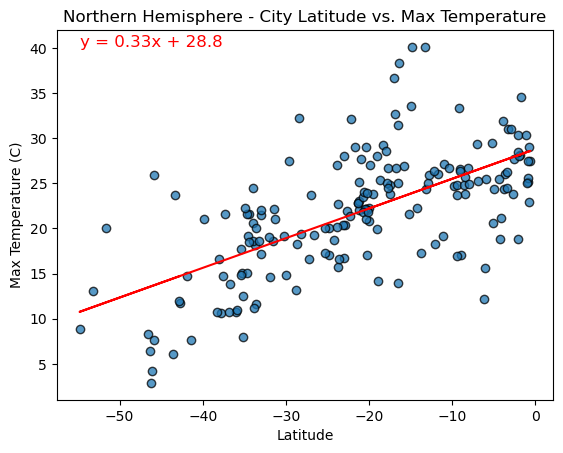

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

xy = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (C)", "Northern Hemisphere - City Latitude vs. Max Temperature", xy)

**Discussion about the linear relationship:**

Northern Hemisphere:

   - The r-squared value (around 0.72) shows a strong negative correlation between latitude and temperature
   - As latitude increases temperature decreases
 
Southern Hemisphere: 

   - The r-squared value (around 0.41) shows a mild correlation between latitude and temperatures
   - As latitude decreases temperatures could decrease

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789608


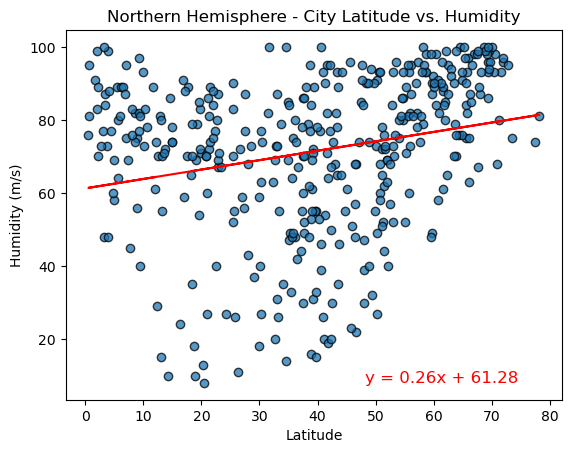

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

xy = ((max(x_values)-30), min(y_values))

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (m/s)", "Northern Hemisphere - City Latitude vs. Humidity", xy)

The r-squared is: 0.0002808747046324618


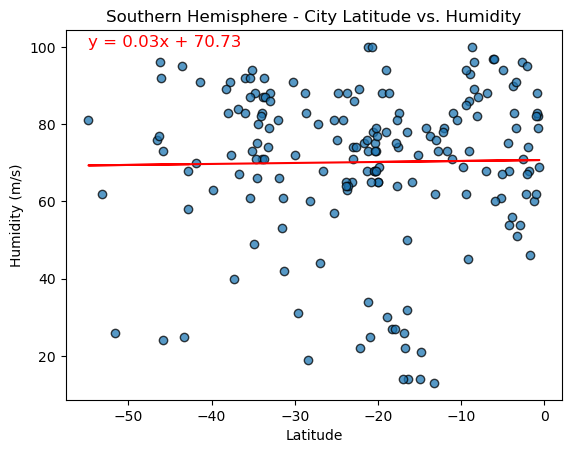

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

xy = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (m/s)", "Southern Hemisphere - City Latitude vs. Humidity", xy)

**Discussion about the linear relationship:**

There is very little to no correlation between humidity and latitude in either Hemisphere
   - Northern Hemisphere R-Squared - 0.06 (rounded)
   - Southern Hemisphere R-Squared - 0.03 (rounded)

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811043


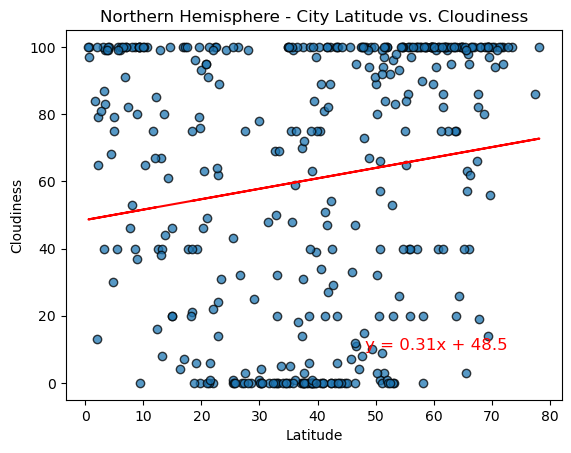

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

xy = ((max(x_values)-30), (min(y_values)+10))

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern Hemisphere - City Latitude vs. Cloudiness", xy)

The r-squared is: 0.020567354299943663


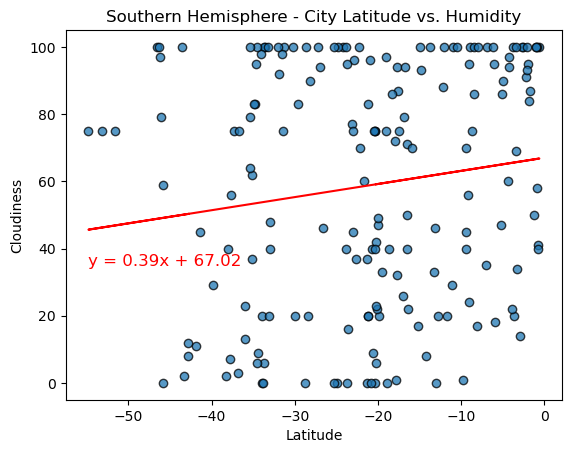

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

xy = (min(x_values), (min(y_values)+35))

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern Hemisphere - City Latitude vs. Humidity", xy)

**Discussion about the linear relationship:** 

There is very little to no correlation between cloudiness and latitude in either Hemisphere

   - Northern Hemisphere R-Squared - 0.024 (rounded)
   - Southern Hemisphere R-Squared - 0.02 (rounded)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449474


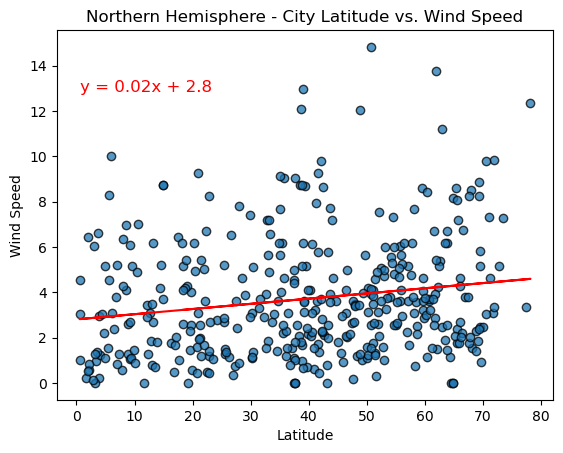

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

xy = (min(x_values), max(y_values)-2)

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed", xy)

The r-squared is: 0.06223904070051575


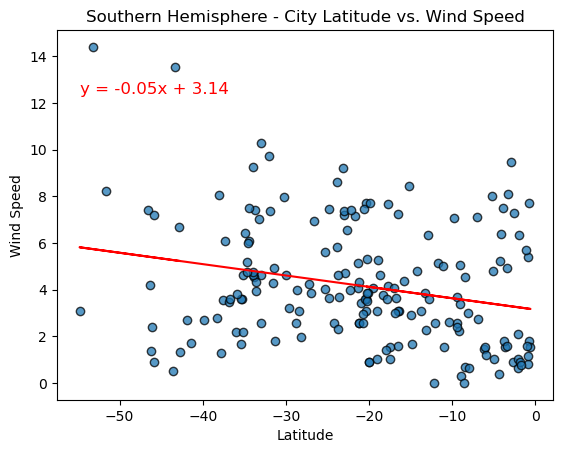

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

xy = (min(x_values), (max(y_values)-2))

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern Hemisphere - City Latitude vs. Wind Speed", xy)

**Discussion about the linear relationship:**

There is very little to no correlation between wind speed and latitude in either Hemisphere

   - Northern Hemisphere R-Squared - 0.03 (rounded)
   - Southern Hemisphere R-Squared - 0.06 (rounded)